<a href="https://colab.research.google.com/github/thejustinfields/project2_/blob/main/AdultIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA


## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename="/content/drive/MyDrive/adult.csv"
df = pd.read_csv(filename)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- There are no missing values
- There are 48842 rows and 15 columns

##Drop Irrelevant Columns

In [4]:
df = df.drop(columns=["fnlwgt", "educational-num", "relationship"])
df.head()

,age,workclass,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,Never-married,?,White,Female,0,0,30,United-States,<=50K


- "fnlwgt" and "educational-num" are not relevant to outcomes
- "Relationship" gives the same information as "marital-status"

In [5]:
pd.set_option("display.max_columns", None)
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


##Drop Duplicates

In [6]:
df.duplicated().sum()

7916

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

##Check Data Inconsitencies

In [10]:
dtypes=df.dtypes
str_cols = dtypes[dtypes=="object"].index
str_cols

Index(['workclass', 'education', 'marital-status', 'occupation', 'race',
       'gender', 'native-country', 'income'],
      dtype='object')

In [11]:
#check column information for inconsistencies
for col in str_cols:
  print(f"-Column= {col}")
  print(df[col].value_counts(dropna=False))
  print("/n/n")

-Column= workclass
Private             26927
Self-emp-not-inc     3721
Local-gov            2982
?                    2324
State-gov            1910
Self-emp-inc         1644
Federal-gov          1387
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
/n/n
-Column= education
HS-grad         12170
Some-college     8741
Bachelors        6766
Masters          2482
Assoc-voc        1930
11th             1560
Assoc-acdm       1547
10th             1256
7th-8th           928
Prof-school       811
9th               734
12th              606
Doctorate         576
5th-6th           496
1st-4th           242
Preschool          81
Name: education, dtype: int64
/n/n
-Column= marital-status
Married-civ-spouse       19178
Never-married            12189
Divorced                  5919
Widowed                   1489
Separated                 1488
Married-spouse-absent      626
Married-AF-spouse           37
Name: marital-status, dtype: int64
/n/n
-Column= occupation
Prof-

In [12]:
#Drop rows with ? as an entry
df.drop(df[df["workclass"] == "?"].index, inplace=True)
df.drop(df[df["occupation"] == "?"].index, inplace=True)
#Rename native-country to remove the "-"
df = df.rename(columns = {"native-country": "nativecountry"})
df.drop(df[df["nativecountry"] == '?'].index, inplace=True)
df.head()

,age,workclass,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,nativecountry,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K


In [13]:
#Check value counts
pd.set_option("display.max_rows", None)
df["capital-gain"].value_counts()

0        34037
15024      486
7688       381
7298       345
99999      226
3103       146
5178       135
5013       115
4386       101
3325        80
8614        78
2174        72
10520       64
4650        62
27828       56
4064        52
3137        49
14084       47
20051       44
594         42
6849        41
3908        41
13550       40
2829        40
14344       34
4787        34
1055        31
3411        30
3464        30
2597        29
2176        28
2885        28
4101        28
2202        27
4865        24
9386        23
1506        23
4416        23
2407        22
4508        21
3674        20
2354        20
2580        18
5455        18
2907        17
10605       16
3942        16
2463        15
6497        15
6418        14
7430        14
25236       14
3781        14
2635        13
1151        13
2977        11
2105        11
914         10
15020       10
3471        10
4934        10
2964        10
2653         9
1471         9
6514         9
1831         9
114       

In [14]:
df["capital-loss"].value_counts()

0       35666
1902      289
1977      243
1887      224
2415       66
1485       65
1848       64
1876       59
1590       58
1740       57
1672       48
1741       42
1602       40
1564       40
2258       39
1980       36
1669       34
1719       33
1408       32
2002       31
2001       31
1579       29
2051       29
1974       27
2339       24
1504       23
1721       22
1628       21
2377       21
2444       20
2179       19
1762       18
625        17
2559       17
2205       16
2057       15
2042       12
2824       12
1617       11
1340       11
1092       11
2392       10
1380       10
1573       10
1651       10
1594        9
1726        9
2174        8
2246        8
1668        8
2231        7
880         6
2206        5
2603        5
213         5
2129        5
323         5
2547        5
1258        5
3770        4
1825        4
653         4
1138        4
2238        4
3004        4
2472        4
1411        3
2149        3
1735        3
1429        3
2267        3
1944  

In [15]:
df["age"].value_counts()

33    1087
31    1067
36    1066
37    1052
35    1046
34    1039
38    1035
41    1005
30    1002
39    1000
28     991
32     986
40     984
42     969
29     945
27     938
46     935
45     923
44     920
47     917
43     907
23     887
25     853
26     850
24     829
22     753
48     740
51     736
50     732
49     719
52     634
21     625
53     623
20     577
19     540
54     530
55     516
18     485
56     482
58     474
57     470
59     449
60     371
61     364
17     337
62     307
64     275
63     269
65     211
66     178
67     177
68     136
69     116
70      95
71      90
72      83
73      82
74      59
75      53
76      46
90      44
77      39
80      29
81      27
78      21
79      20
82      10
83       9
84       9
85       5
88       5
89       1
87       1
86       1
Name: age, dtype: int64

In [16]:
df["workclass"].value_counts()

Private             26335
Self-emp-not-inc     3655
Local-gov            2946
State-gov            1875
Self-emp-inc         1595
Federal-gov          1361
Without-pay            21
Name: workclass, dtype: int64

In [17]:
#Delete without-pay because it is statistically insignificant
df["workclass"] = df["workclass"].astype("category")
df["workclass"] = df["workclass"].cat.remove_categories("Without-pay")
df["workclass"].value_counts()

Private             26335
Self-emp-not-inc     3655
Local-gov            2946
State-gov            1875
Self-emp-inc         1595
Federal-gov          1361
Name: workclass, dtype: int64

In [18]:
#Combine all government employees
df['workclass'] = df['workclass'].replace({'Local-gov':'Government'})
df['workclass'] = df['workclass'].replace({'State-gov':'Government'})
df['workclass'] = df['workclass'].replace({'Federal-gov':'Government'})
df['workclass'].value_counts()

Private             26335
Government           6182
Self-emp-not-inc     3655
Self-emp-inc         1595
Name: workclass, dtype: int64

In [19]:
df["education"].value_counts()

HS-grad         11287
Some-college     8054
Bachelors        6325
Masters          2340
Assoc-voc        1828
Assoc-acdm       1454
11th             1389
10th             1118
7th-8th           798
Prof-school       762
9th               655
12th              529
Doctorate         526
5th-6th           436
1st-4th           217
Preschool          70
Name: education, dtype: int64

In [20]:
#Remove Preschool because it is statistically insignificant
df["education"] = df["education"].astype("category")
df["education"] = df["education"].cat.remove_categories("Preschool")
df["education"].value_counts()

HS-grad         11287
Some-college     8054
Bachelors        6325
Masters          2340
Assoc-voc        1828
Assoc-acdm       1454
11th             1389
10th             1118
7th-8th           798
Prof-school       762
9th               655
12th              529
Doctorate         526
5th-6th           436
1st-4th           217
Name: education, dtype: int64

In [21]:
#Combine categories to create less categories
df['education'] = df['education'].replace({'1st-4th':'Gradeschool'})
df['education'] = df['education'].replace({'5th-6th':'Gradeschool'})
df['education'] = df['education'].replace({'7th-8th':'Gradeschool'})
df['education'] = df['education'].replace({'9th':'Highschool'})
df['education'] = df['education'].replace({'10th':'Highschool'})
df['education'] = df['education'].replace({'11th':'Highschool'})
df['education'] = df['education'].replace({'12th':'Highschool_Grad'})
df['education'] = df['education'].replace({'HS-grad':'Highschool'})
df['education'] = df['education'].replace({'Some-college':'Undergrad'})
df['education'] = df['education'].replace({'Bachelors':'Undergrad'})
df['education'] = df['education'].replace({'Assoc-voc':'Undergrad'})
df['education'] = df['education'].replace({'Assoc-acdm':'Undergrad'})
df['education'] = df['education'].replace({'Prof-school':'Graduate'})
df['education'] = df['education'].replace({'Masters':'Graduate'})
df['education'] = df['education'].replace({'Doctorate':'Graduate'})
df['education'].value_counts()

Undergrad          17661
Highschool         14449
Graduate            3628
Gradeschool         1451
Highschool_Grad      529
Name: education, dtype: int64

In [22]:
df["marital-status"].value_counts()

Married-civ-spouse       17911
Never-married            11079
Divorced                  5593
Separated                 1370
Widowed                   1252
Married-spouse-absent      551
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [23]:
#Remove Married-AF-spouse because it is statistically insignificant
df["marital-status"] = df["marital-status"].astype("category")
df["marital-status"] = df["marital-status"].cat.remove_categories("Married-AF-spouse")
df["marital-status"].value_counts()

Married-civ-spouse       17911
Never-married            11079
Divorced                  5593
Separated                 1370
Widowed                   1252
Married-spouse-absent      551
Name: marital-status, dtype: int64

In [24]:
df["occupation"].value_counts()

Prof-specialty       5415
Exec-managerial      5197
Sales                4477
Craft-repair         4462
Adm-clerical         4413
Other-service        4005
Machine-op-inspct    2312
Transport-moving     2002
Handlers-cleaners    1624
Farming-fishing      1411
Tech-support         1295
Protective-serv       932
Priv-house-serv       229
Armed-Forces           14
Name: occupation, dtype: int64

In [25]:
#Remove Armed Forces because it is statistically insignificant
df["occupation"] = df["occupation"].astype("category")
df["occupation"] = df["occupation"].cat.remove_categories("Armed-Forces")
df["occupation"].value_counts()

Prof-specialty       5415
Exec-managerial      5197
Sales                4477
Craft-repair         4462
Adm-clerical         4413
Other-service        4005
Machine-op-inspct    2312
Transport-moving     2002
Handlers-cleaners    1624
Farming-fishing      1411
Tech-support         1295
Protective-serv       932
Priv-house-serv       229
Name: occupation, dtype: int64

In [26]:
df["race"].value_counts()

White                 31730
Black                  3973
Asian-Pac-Islander     1297
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [27]:
df["gender"].value_counts()

Male      25410
Female    12378
Name: gender, dtype: int64

In [28]:
df["nativecountry"].value_counts()

United-States                 33897
Mexico                          874
Philippines                     280
Germany                         192
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     146
Cuba                            133
England                         119
China                           113
Jamaica                         102
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          82
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [29]:
#Combine nations into continents
df['nativecountry'] = df['nativecountry'].replace({'Holand-Netherlands':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Hungary':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Scotland':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Yugoslavia':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Ireland':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'France':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Greece':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Portugal':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Poland':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Italy':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'England':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Germany':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Honduras':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Ecuador':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Peru':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Nicaragua':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Columbia':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Guatemala':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'El-Salvador':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Mexico':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Philippines':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'India':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'China':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Japan':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Vietnam':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Iran':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Taiwan':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Thailand':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Hong':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Cambodia':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Laos':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'South':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'United-States':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Canada':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Outlying-US(Guam-USVI-etc)':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Puerto-Rico':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Cuba':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Jamaica':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Dominican-Republic':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Haiti':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Trinadad&Tobago':'NorthAmerica'})
df['nativecountry'].value_counts()

NorthAmerica           34684
CentralSouthAmerica     1341
Asia                    1027
Europe                   736
Name: nativecountry, dtype: int64

##Check for Outliers

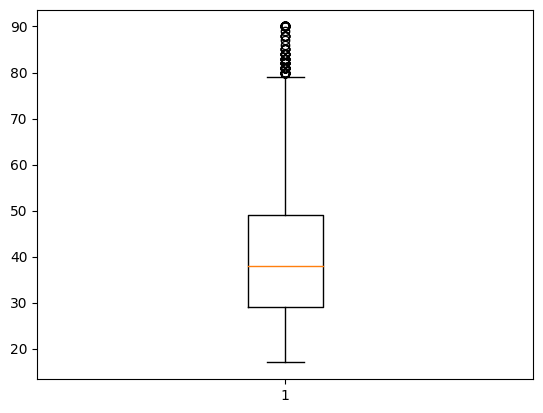

In [30]:
data = df["age"]
fig, ax = plt.subplots()
ax.boxplot([data]);

In [31]:
df["age"].describe().round(0)

count    37788.0
mean        40.0
std         13.0
min         17.0
25%         29.0
50%         38.0
75%         49.0
max         90.0
Name: age, dtype: float64

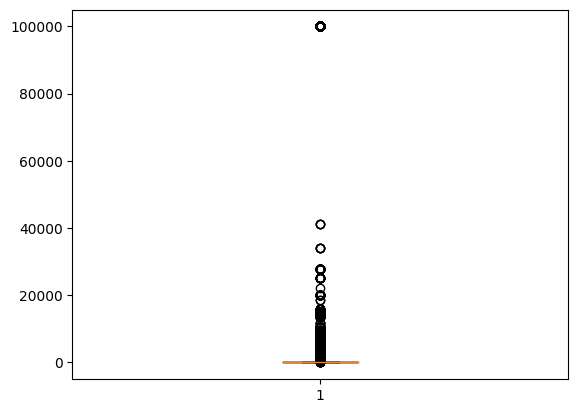

In [32]:
data = df["capital-gain"]
fig, ax = plt.subplots()
ax.boxplot([data]);

In [33]:
df["capital-gain"].describe().round(0)

count    37788.0
mean      1301.0
std       8142.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max      99999.0
Name: capital-gain, dtype: float64

##Univariate Visuals

In [34]:
# Checking how many categories in each column
cat_cols = df.select_dtypes('object').columns
df[cat_cols].nunique()

race             5
gender           2
nativecountry    4
income           2
dtype: int64

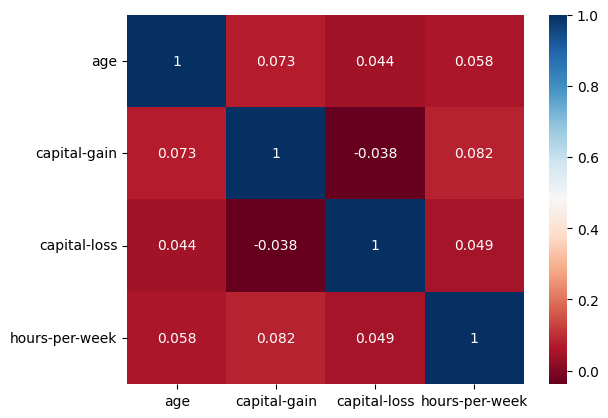

In [35]:
sns.heatmap(df.corr(), cmap="RdBu", annot=True);

AttributeError: ignored

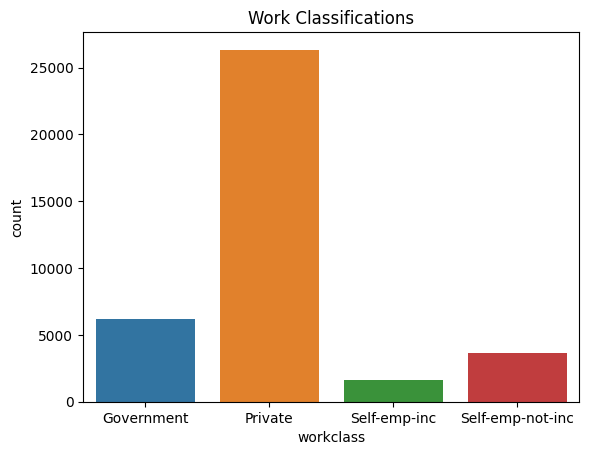

In [36]:
ax = sns.countplot(data=df, x="workclass").set(title="Work Classifications")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [ ]:
ax = sns.countplot(data=df, x="education").set(title="Education Levels")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [ ]:
ax = sns.countplot(data=df, x="marital-status").set(title="Marital Status")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [ ]:
ax = sns.countplot(data=df, x="occupation").set(title="Occupation")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [ ]:
ax = sns.countplot(data=df, x="race").set(title="Race")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [ ]:
ax = sns.countplot(data=df, x="gender").set(title="Genders")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [ ]:
ax = sns.countplot(data=df, x="income").set(title="Income Levels")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

- More people make less than 50k than those who earn over 50k

##Explanatory Visualizations

In [ ]:
fig=plt.subplots(figsize=(12,7))
ax = sns.barplot(data=df, x="age", y="income", hue='nativecountry')

- The highest earners globally are over 40.
- The highest earners live in Europe

##Modeling

In [37]:
#Convert target to numeric values
df['income'] = df['income'].replace({'<=50':0, '>50k':1})
# Save X data
X = df.drop(columns = 'income')
# Encode our target
y = df['income']

In [38]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [39]:
#Imputers
freq_imputer = SimpleImputer(strategy="most_frequent")
mean_imputer = SimpleImputer(strategy="mean")
#Scaler
scaler = StandardScaler()
#OneHotEndoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse = False)

In [40]:
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

In [41]:
#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [42]:
#Categorical Pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [43]:
#Tuples for ColumnTransformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
#ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2efc92a470>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2efc929270>)])

In [44]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2efc92a470>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2efc929270>)])

In [45]:
#transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [49]:
knn_predictions = knn_pipe.predict(X_test_processed)
knn_predictions

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [51]:
knn_acc_score = knn_pipe.score(X_test_processed, y_test)
knn_acc_score

0.7822589181750821

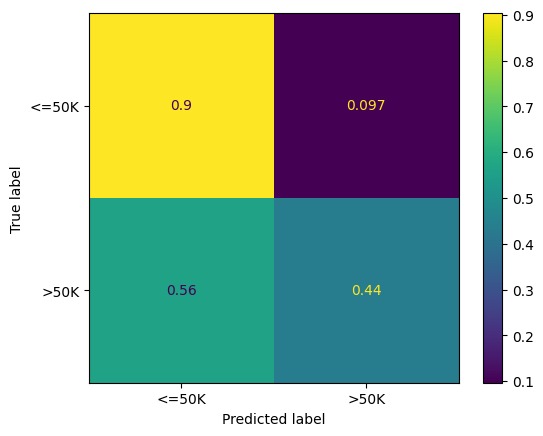

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions, normalize='true');

In [53]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [54]:
knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [57]:
knn_pipe_gs = GridSearchCV(knn_pipe, knn_param_grid)

knn_pipe_gs.fit(X_train_processed, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test_processed, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.7932677040330264


In [58]:
knn_gs_predictions = knn_pipe_gs.predict(X_test_processed)
knn_gs_predictions

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [60]:
knngs_acc_score = knn_pipe_gs.score(X_test_processed, y_test)
knngs_acc_score

0.7932677040330264

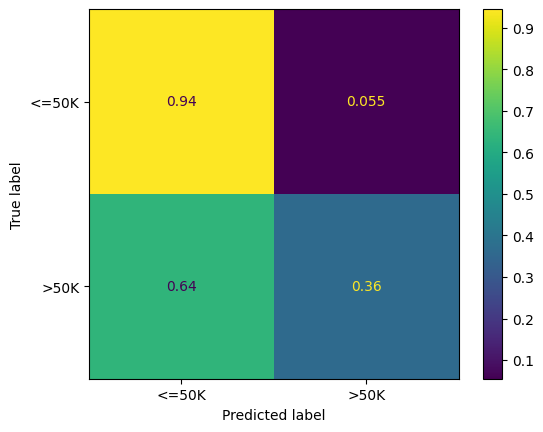

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_gs_predictions, normalize='true');

###Random Forest

In [62]:
rf = RandomForestClassifier()

In [63]:
rf.fit(X_train_processed, y_train)

RandomForestClassifier()

In [65]:
rf.predict(X_test_processed)

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [66]:
rf_predictions = rf.predict(X_test_processed)
rf_predictions

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [68]:
rf_acc_score = rf.score(X_test_processed, y_test)
rf_acc_score

0.806287710384249

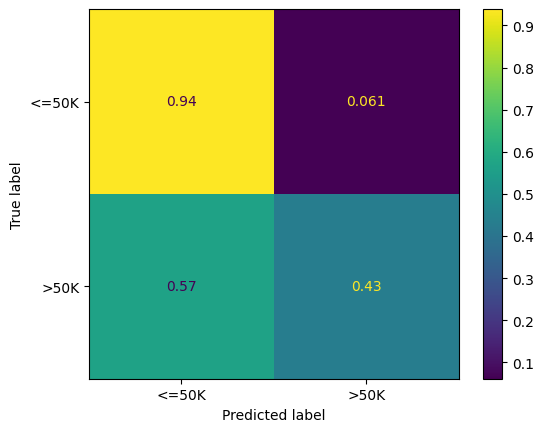

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_predictions, normalize='true');

In [70]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [71]:
rf_param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

In [72]:
rf_grid_search = GridSearchCV(rf, rf_param_grid)

In [74]:
rf_grid_search.fit(X_train_processed, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [76]:
print('Best Random Forest Parameters:')
print(rf_grid_search.best_params_)
best_pipe = rf_grid_search.best_estimator_
print(f'Accuracy of best Logistic Regression model is: {best_pipe.score(X_test_processed, y_test)}')

Best Random Forest Parameters:
{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy of best Logistic Regression model is: 0.798877950672171


In [78]:
rf_gs_predictions = rf_grid_search.predict(X_test_processed)
rf_gs_predictions

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [80]:
rfgs_acc_score = rf_grid_search.score(X_test_processed, y_test)
rfgs_acc_score

0.798877950672171

###Logistic Regression

In [81]:
# Make an instance of the model with default parameters
logreg = LogisticRegression()
# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Train the model on the data, store the information learned from the data
logreg_pipe.fit(X_train_processed, y_train)

logreg_predictions = logreg_pipe.predict(X_test_processed)
print(logreg_pipe.score(X_train_processed, y_train))
print(logreg_pipe.score(X_test_processed, y_test))

0.7863166437316961
0.792209166931301


In [82]:
accuracy = accuracy_score(y_test, logreg_predictions)
accuracy

0.792209166931301

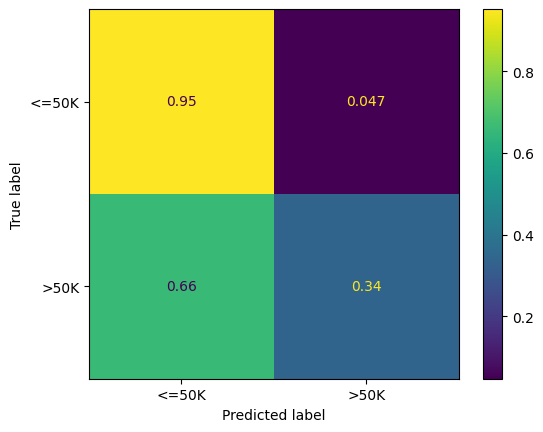

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, logreg_predictions, normalize='true');

In [84]:
#GridSearchCV
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
lr_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [85]:
pipe_param_grid = {'logisticregression__penalty': ['l1', 'l2'],
               'logisticregression__solver': ['liblinear'],
              'logisticregression__C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]}

In [86]:
lr_pipe_gs = GridSearchCV(lr_pipe, pipe_param_grid)

lr_pipe_gs.fit(X_train_processed, y_train)
print('Best Logistic Regression Parameters:')
print(lr_pipe_gs.best_params_)
best_pipe = lr_pipe_gs.best_estimator_
print(f'Accuracy of best Logistic Regression model is: {best_pipe.score(X_test_processed, y_test)}')

Best Logistic Regression Parameters:
{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Accuracy of best Logistic Regression model is: 0.793796972583889


In [88]:
lr_pipe_predictions = lr_pipe_gs.predict(X_test_processed)

In [89]:
lr_pipe_accuracy = accuracy_score(y_test, lr_pipe_predictions)
lr_pipe_accuracy

0.793796972583889

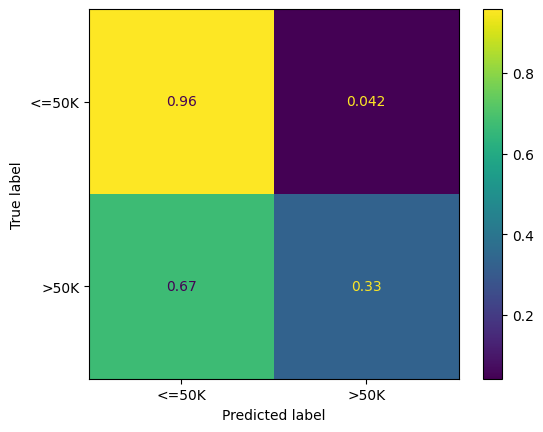

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_pipe_predictions, normalize='true');